In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
fraud = pd.read_csv('card_transdata.csv')

In [4]:
fraud.head

<bound method NDFrame.head of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2              

In [5]:
fraud.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [6]:
fraud.shape

(1000000, 8)

In [7]:
fraud.size

8000000

In [8]:
fraud.columns = fraud.columns.str.lower()

In [9]:
fraud.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [10]:
fraud.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [11]:
fraud.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [12]:
fraud[fraud.duplicated(subset=['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],keep=False)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [13]:
fraud.drop_duplicates(subset=['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],keep='first',inplace=True)

In [14]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 68.7 MB


In [15]:
fraud.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='fraud', ylabel='count'>

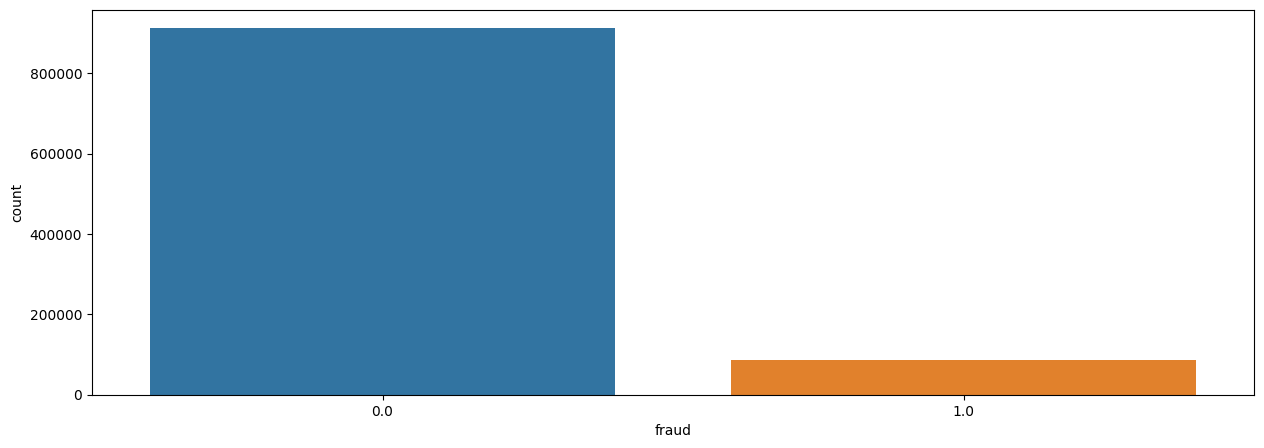

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud,x='fraud')

In [17]:
fraud['fraud'].value_counts().to_frame()

,fraud
0.0,912597
1.0,87403


In [18]:
from sklearn.utils import resample

In [19]:
fraud_majority=fraud[fraud['fraud']==0]
fraud_minority=fraud[fraud['fraud']==1]

In [20]:
fraud_majority_downsample=resample(fraud_majority,n_samples=87403,replace=False,random_state=42)

In [21]:
fraud_df=pd.concat([fraud_majority_downsample,fraud_minority])

In [22]:
fraud_df['fraud'].value_counts().to_frame()

,fraud
0.0,87403
1.0,87403


<Axes: xlabel='fraud', ylabel='count'>

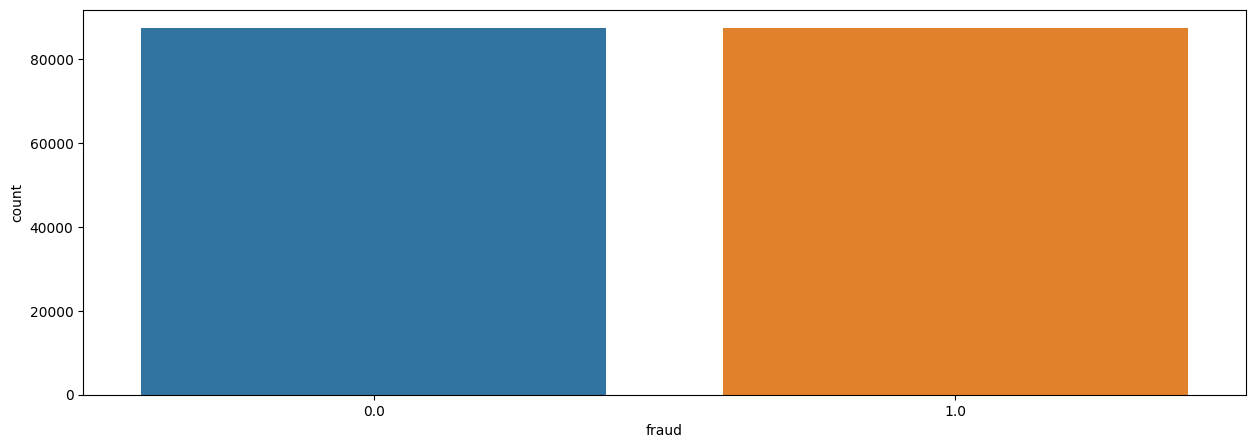

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud_df,x='fraud')

In [24]:
fraud_df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.015022,-0.076533,0.152405,-0.101151,-0.035361,0.054463,0.206027
distance_from_last_transaction,-0.015022,1.000000,-0.036229,-0.014713,-0.033541,-0.018560,0.021599,0.110292
ratio_to_median_purchase_price,-0.076533,-0.036229,1.000000,-0.038964,0.034675,-0.090200,0.136997,0.480414
repeat_retailer,0.152405,-0.014713,-0.038964,1.000000,-0.007316,-0.000709,0.075144,-0.001553
used_chip,-0.101151,-0.033541,0.034675,-0.007316,1.000000,0.019620,-0.024932,-0.110516
used_pin_number,-0.035361,-0.018560,-0.090200,-0.000709,0.019620,1.000000,-0.073102,-0.232522
online_order,0.054463,0.021599,0.136997,0.075144,-0.024932,-0.073102,1.000000,0.393538
fraud,0.206027,0.110292,0.480414,-0.001553,-0.110516,-0.232522,0.393538,1.000000


In [25]:
df_corr_class=fraud_df.corr()['fraud'].to_frame()

<Axes: xlabel='fraud'>

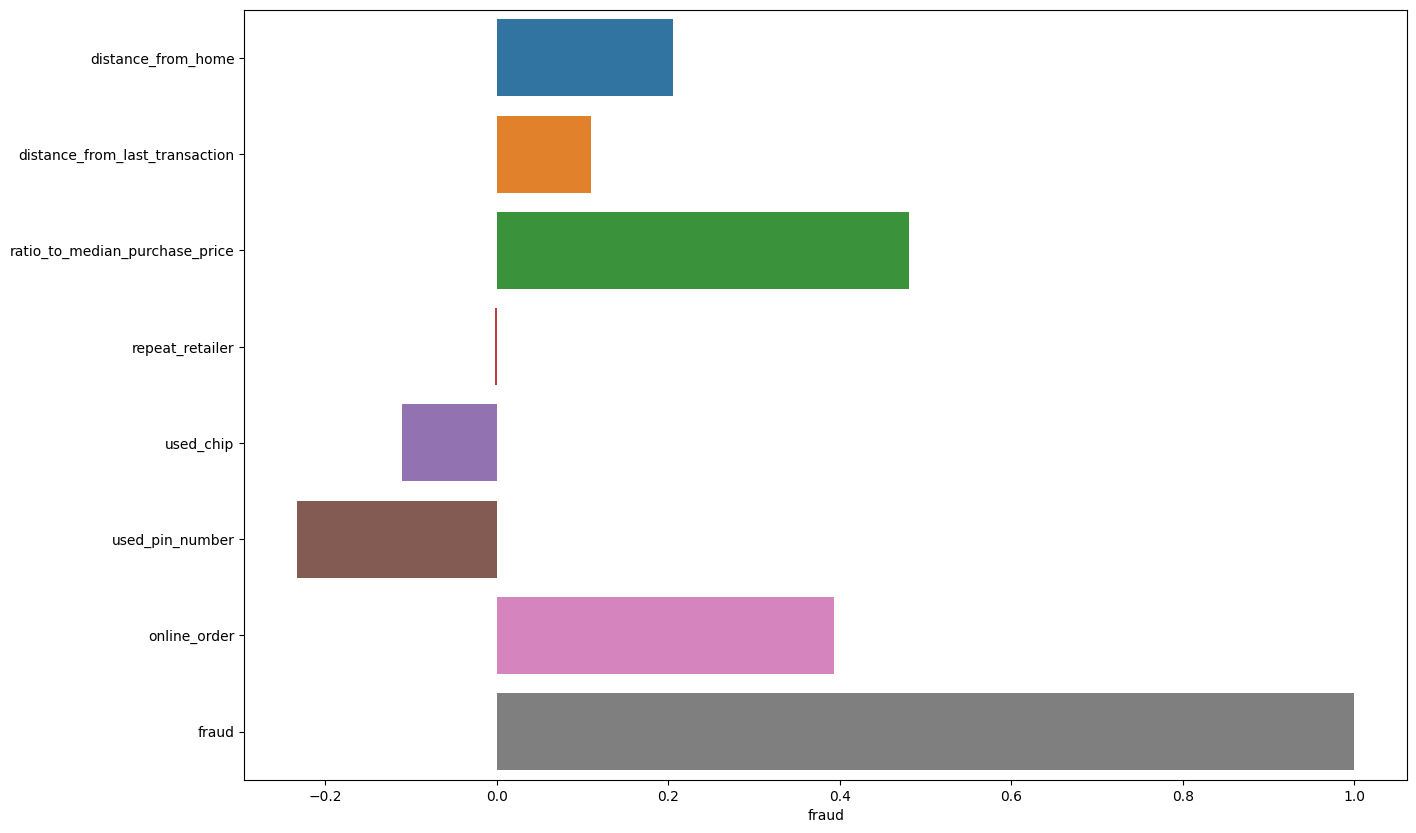

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_corr_class,y=df_corr_class.index,x='fraud')

In [27]:
x=fraud_df.drop(['fraud'],axis=1)
y=fraud_df['fraud']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((122364, 7), (52442, 7), (122364,), (52442,))

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr=LogisticRegression(max_iter=500)

In [33]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [34]:
lr.score(x_train,y_train)

0.9412899218724461

In [35]:
lr.score(x_test,y_test)

0.9393615804126464

In [36]:
y_pred=lr.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [38]:
precision_score(y_test,y_pred)

0.9317610888230663

In [39]:
recall_score(y_test,y_pred)

0.948113387509061

In [40]:
accuracy_score(y_test,y_pred)

0.9393615804126464

In [41]:
f1_score(y_test,y_pred)

0.9398661170152415

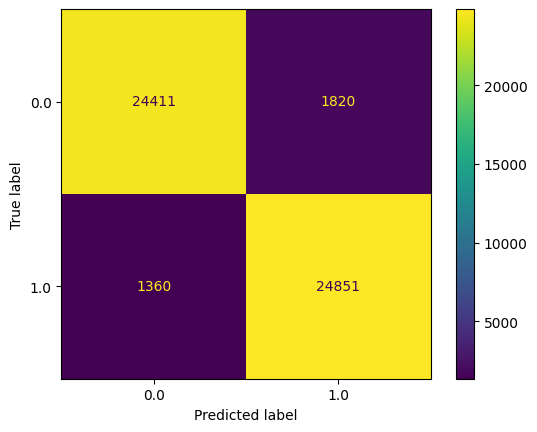

In [42]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()